# Koreliacija COVID-19 pandemijos metu
> BTC ir ETH koreliacija su rinkomis pandemijos metu.

- toc: true 
- badges: true
- comments: false
- categories: [Dominykas Tautkus]
- image: images/BTC_price.png

In [1]:
#hide
%load_ext autoreload
%autoreload 2
import warnings
warnings.filterwarnings('ignore')
import plotly.graph_objects as go
import pandas as pd
import plotly.express as px
from scripts.read_data import read_api
from scripts.read_data import read_news
from scripts.read_data import read_covid
import matplotlib.pyplot as plt 
import numpy as np
import pandas as pd
import seaborn as sns 
from IPython.display import Markdown as md
sns.set()

In [2]:
#hide
df_all = read_api()
#df_all.index.name = 'date'

df_all.index = pd.to_datetime(df_all.index)
df_covid = df_all.loc[df_all.index > '2019-12-31 08:00:00']
df_covid = df_covid[['ETH', 'BTC', 'XAU', 'SP500']]
#df_covid = df_covid[['ETH', 'BTC', 'XAU']] ;

In [3]:
#hide
market = read_news('market')
covid = read_covid() ;

### Šios dienos kriptovaliutų ir pandemijos naujienos

In [4]:
#hide_input
#md('##### {}'.format(titleBTC)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(market['title'],'. ', market['body'], ' ...', market['url']))

- Despite ATH, Bitcoin Futures market ‘less exuberant’ than early 2021.  Half a year after May’s crypto crash and the ensuing market carnage, an investor might assume that the king coin is stronger than ever. Furthermore, with the debut of the ProShares Bitcoin ETF which shot past $1 billion in Assets under Management (AUM) in less than three days, the BTC Futures market also appears to [&#8230;] ... [| Skaityti daugiau](https://ambcrypto.com/despite-ath-bitcoin-futures-market-less-exuberant-than-early-2021/) 

In [5]:
#hide_input
#md('##### {}'.format(titleETH)) 
md("- {}{} {}{} [| Skaityti daugiau]({}) ".format(covid['title'],'. ', covid['description'], ' ...', covid['url']))

- Ontario doctor's obstruction charges dropped as husband pleads guilty over COVID-19 tracing | CBC News.  An Ontario doctor facing non-criminal allegations that she misled health officials about her contacts after she caught COVID-19 last Christmas has had all counts against her dropped, as her husband pleaded guilty. ... [| Skaityti daugiau](http://www.cbc.ca/news/health/doctor-nursing-homes-covid-contact-tracing-charges-dropped-1.6244377) 

### Kainų kaita pandemijos metu

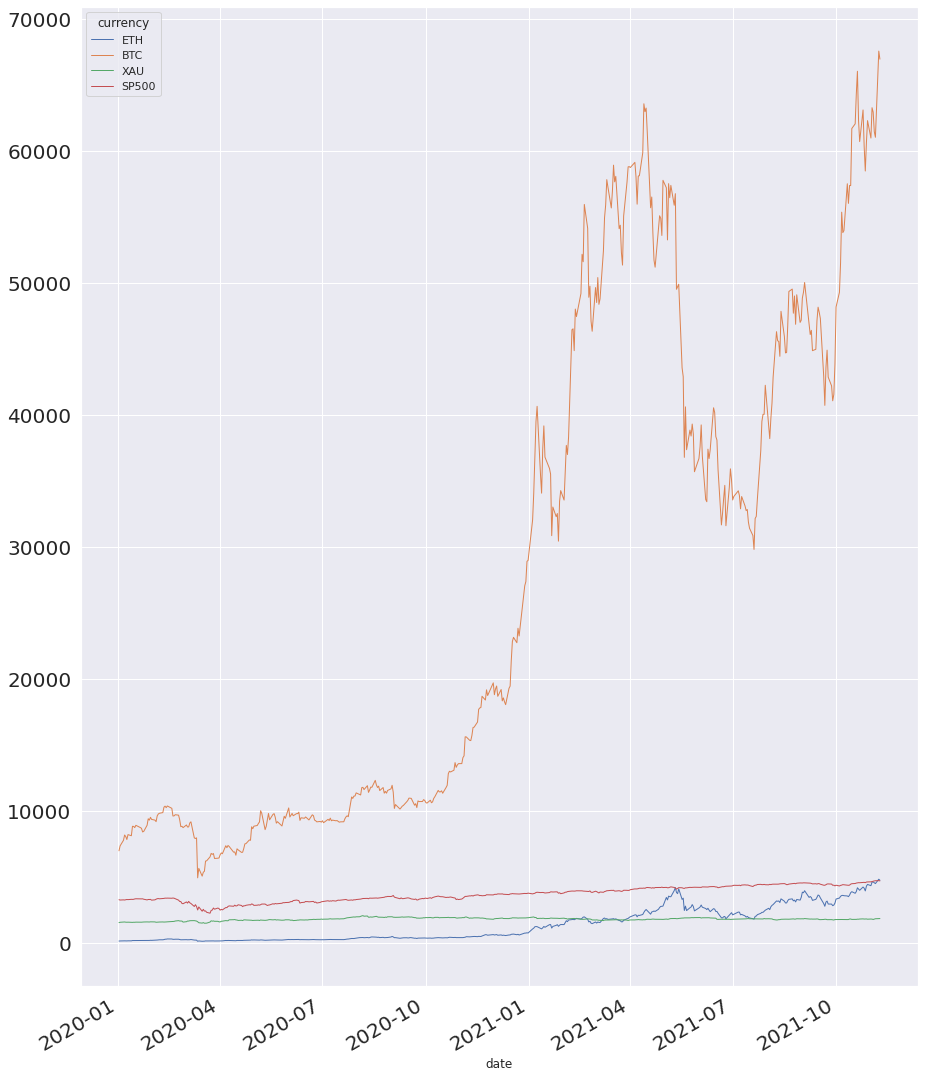

In [6]:
#hide_input
df_covid.plot(figsize=(15,20), linewidth=1, fontsize=20) ;
# plt.savefig('covid-price.eps', format='eps')

### Koreliacija pandemijos metu 

Koreliacijos koeficiento (Spirmano r) matrica.

In [7]:
#hide_input
df_covid.corr()  

currency,ETH,BTC,XAU,SP500
currency,,,,
ETH,1.000000,0.904050,0.142488,0.900945
BTC,0.904050,1.000000,0.119364,0.866763
XAU,0.142488,0.119364,1.000000,0.305797
SP500,0.900945,0.866763,0.305797,1.000000


In [8]:
#hide ### Koreliacijos matrica.

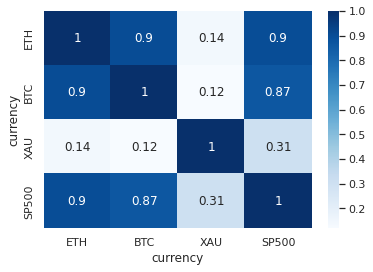

In [9]:
#hide
sns.heatmap(df_covid.corr(), annot=True, cmap="Blues") ;
# plt.savefig('covid.eps', format='eps')